# What is A Markov Chain 
Markov Chains are used to model the change in population from one state to another

**Applications of Markov Chains include:**
- What Brand of soda to customers prefer Coke Pepsi or another brand
- The amount of airplanes at a given terminal 
- Voting Demographics 

# Steady State Matrix
As mentioned Markov Chains are used to model the change in population from one state to another. 

This change in probability can be expressed as the change from the $jth$ state to the $ith$ state. Represented by the number $p_{ij}$ where $0\le p_{ij} \le1$

- When $p_{ij}=0$ there is 0% probability of change in the system 
- When $p_{ij}=1$ there is 100% probability of change in the system 

P is called the **matrix of transition probability** because it gives the possible changes withing a population 

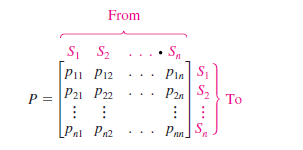


# Markov Chain Function 
## Function Parameters
- **Transition_Probability**: A list in the form of decimals will be used to form the matrix of transtion probability
- **Initial Population**: A list containing the current population 
- **Years**: The amount of time passed

The function can only deal with three populations nothing more nothing less

## Future Updates
The Function still has alot of work to be done. The following is just a list of things I want to add
- Steady State Matrix 
- Absorbing Markov Chains 
- Add parameters to choose how many populations
- Add parameters to prevent code from blowing up

In [179]:
import numpy as np
import sympy as sym

def Markov_Chain(transition_probability,Initial_Population, Years, Steady_State = False):
    
    ## Currently only allowed 3 populations
    if len(transition_probability) != 9:
        return  ValueError("List must contain nine numbers." )
    if len(Initial_Population) !=3:
        return  ValueError("List must contain 3 numbers." )
        
    # Creates Transition Probability Matrix
    P_0 = np.array(transition_probability)
    P_0 = P_0.reshape(3,3)
    
    # If Transition Probability Matrix Values dont add up to 1
    if (P_0[0,0] + P_0[1,0] + P_0[2,0]).round(2) != 1:
        return('Error Transition Matrix does not equal 1')
    if (P_0[0,2] + P_0[1,2] + P_0[2,2]).round(2) != 1:
        return('Error Transition Matrix does not equal 1')
    if (P_0[0,2] + P_0[1,2] + P_0[2,2]).round(2) != 1:
        return('Error Transition Matrix does not equal 1')
    
    # Creates Initial Population Matrix 
    X_n= np.array(Initial_Population)
    d = X_n.sum()
    X_n = X_n/d
    X_n = X_n.reshape(3,1)
    
    
    # Calculates the Final Population 
    for i in range(Years):
        X_n =np.matmul(P_0,X_n)
    Pop_final = np.around(X_n*d)
    
    
    
    # Outputs info
    
    print( 'The Final Population after ', Years, 'Years')
    print('Population A: ' ,Pop_final[0,0])
    print('Population B: ' ,Pop_final[1,0])
    print('Population C: ' ,Pop_final[2,0])
    
    
    # Calculate the Steay State 
    if Steady_State: 
        x,y,z = sym.symbols('x,y,z')
        f = sym.Eq( (P_0[0,0]-1)*x  + P_0[0,1]*y + P_0[0,2]*z ,0)
        g = sym.Eq(P_0[1,0]*x  + (P_0[1,1]-1)*y + P_0[1,2]*z ,0)
        h = sym.Eq(P_0[2,0]*x + P_0[2,1]*y+ (P_0[2,2]-1)*z, 0)
        e = sym.Eq(x + y + z, 1)
        SS = sym.solve([f,g,h,e],(x,y,z))
        X =SS.get(x)
        Y =SS.get(y)
        Z = SS.get(z)
        Steady_State = np.array([X.round(3),Y.round(3),Z.round(3)]).reshape(3,1)
        
        return Steady_State

In [178]:
Markov_Chain([0.70, 0.15, 0.15, 0.20, 0.80, 0.15,0.10,0.05,0.70], [15000,20000,65000],3)

The Final Population after  3 Years
Population A:  30283.0
Population B:  39042.0
Population C:  30675.0


In [181]:
Markov_Chain([0.70, 0.15, 0.15, 0.20, 0.80, 0.15,0.10,0.05,0.70], [15000,20000,65000],3,True)

The Final Population after  3 Years
Population A:  30283.0
Population B:  39042.0
Population C:  30675.0


array([[0.333],
       [0.476],
       [0.190]], dtype=object)